# Multi-task model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import os 
import shutil

import copy

import tensorflow as tf
import tensorflow.keras as K

from sklearn.model_selection import train_test_split
import CCLE_utils
import MMRF_utils


In [54]:
from sklearn.linear_model import LinearRegression

## Load encoded cell line data

In [2]:
with pd.HDFStore('normalized_embeddings.h5') as store:
    print(store.keys())

['/ccle_test_ccleae', '/ccle_test_combinedae', '/ccle_test_mmrfae', '/ccle_train_ccleae', '/ccle_train_combinedae', '/ccle_train_mmrfae', '/ccle_valid_ccleae', '/ccle_valid_combinedae', '/ccle_valid_mmrfae', '/mmrf_test_ccleae', '/mmrf_test_combinedae', '/mmrf_test_mmrfae', '/mmrf_train_ccleae', '/mmrf_train_combinedae', '/mmrf_train_mmrfae', '/mmrf_valid_ccleae', '/mmrf_valid_combinedae', '/mmrf_valid_mmrfae']


In [48]:
X_train = pd.read_hdf("normalized_embeddings.h5", key = 'ccle_train_mmrfae', index_col=1)
X_train = X_train.set_index(X_train.iloc[:, 0])
X_train = X_train.iloc[: , 1:]

X_val = pd.read_hdf("normalized_embeddings.h5", key = 'ccle_valid_mmrfae', index_col=1)
X_val = X_val.set_index(X_val.iloc[:, 0])
X_val = X_val.iloc[: , 1:]

X_test = pd.read_hdf("normalized_embeddings.h5", key = 'ccle_test_mmrfae', index_col=1)
X_test = X_test.set_index(X_test.iloc[:, 0])
X_test = X_test.iloc[: , 1:]

In [32]:
crispr_rnaseq_merged = pd.read_csv('rnaseq_crispr_merged.csv')
crispr_rnaseq_merged = crispr_rnaseq_merged.set_index(['DepMap_ID'])
response_cols = [col for col in crispr_rnaseq_merged.columns if '_y' in col]
crispr = crispr_rnaseq_merged[response_cols]

In [49]:
train_index = list(set(X_train.index).intersection(crispr.index))
val_index = list(set(X_val.index).intersection(crispr.index))
test_index = list(set(X_test.index).intersection(crispr.index))

In [61]:
# list(X_train.index)
X_train = np.array(X_train.loc[train_index])
Y_train = np.array(crispr.loc[train_index])

X_val = np.array(X_val.loc[val_index])
Y_val = np.array(crispr.loc[val_index])

X_test = np.array(X_test.loc[test_index])
Y_test = np.array(crispr.loc[test_index])



In [64]:
X_train.shape

(559, 128)

In [63]:
Y_train[:,1].shape

(559,)

# Linear regression for each KO gene

In [68]:
def plot_pred(y_train, y_train_pred, y_test, y_test_pred, i):

    fig, ax = plt.subplots(1,1)

    ax.scatter(y_train[:,i],y_train_pred, label='Train', color='#4287f5')
    ax.scatter(y_test[:,i],y_test_pred, label='Test', color='#f2797f')
    # ax.set_xlim(-4,2)
    # ax.set_ylim(-4,2)
    ax.set_xlabel('True Response')
    ax.set_ylabel('Predicted Response')
    ax.legend()
    ax.set_title('CRISPR Knockout Experiment '+str(i))

In [71]:
def make_reg(X_train, Y_train, X_test, Y_test, i):
    reg = LinearRegression().fit(X_train, Y_train[:,i])
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    plot_pred(Y_train, y_train_pred, Y_test, y_test_pred, i)

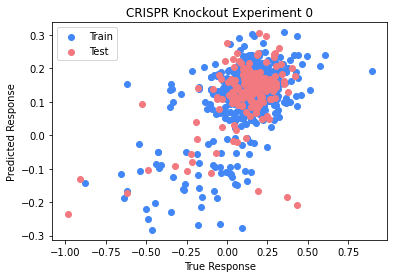

In [72]:
make_reg(X_train, Y_train, X_test, Y_test, 0)

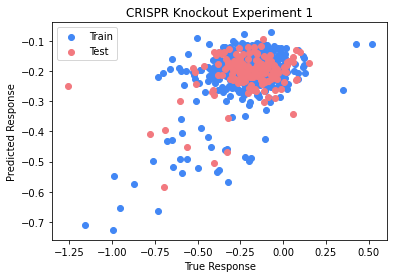

In [73]:
make_reg(X_train, Y_train, X_test, Y_test,1)

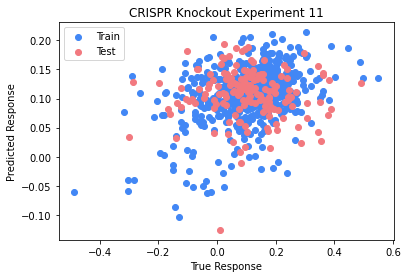

In [74]:
make_reg(X_train, Y_train, X_test, Y_test, 11)

In [ ]:
# NN

In [ ]:
def plot_loss(perf_dict):
    fig = plt.figure(figsize=(15,10))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    loss = perf_dict['loss']
    val_loss = perf_dict['val_loss']
    ax1.plot(loss)
    ax2.plot(val_loss)
    ax1.set_xlabel('epochs')
    ax2.set_xlabel('epochs')

    ax1.set_ylabel('loss')
    ax2.set_ylabel('val_loss')
    plt.show()

In [ ]:
plot_loss(history.history)

In [ ]:
y_train_pred = np.array(model.predict(X_train))
y_test_pred = np.array(model.predict(X_test))

In [ ]:
def plot_pred(y_train, y_train_pred, y_test, y_test_pred, i):

    fig, ax = plt.subplots(1,1)

    ax.scatter(y_train.T[:,:,i],y_train_pred[:,:,i], label='Train', color='#4287f5')
    ax.scatter(y_test.T[:,:,i],y_test_pred[:,:,i], label='Test', color='#f2797f')
    # ax.set_xlim(-4,2)
    # ax.set_ylim(-4,2)
    ax.set_xlabel('True Response')
    ax.set_ylabel('Predicted Response')
    ax.legend()
    ax.set_title('CRISPR Knockout Experiment '+str(i))

In [ ]:
print(np.array(model_.predict(X_enc_train))[:,:,0].shape)
print(y_crispr_train.T.shape)

# Feature transfer patient data
Freeze network except the last layer, then train on patient data

In [ ]:
model.summary()

In [ ]:
model.trainable = False
model.layers[-1].trainable = True

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])      

In [ ]:
history_pt = model.fit(X_pt_train, y_pt_train, epochs=100, validation_data=(X_pt_test, y_pt_test))

In [ ]:
plt.scatter(y_pt_test,model.predict(X_pt_test))

# Save model

In [ ]:
model = K.models.load_model(model_dir)

In [ ]:
model_dir = os.path.join('6.871models', 'simpleNN042721')
shutil.rmtree(model_dir)
model.save(model_dir)
